# best markets to advertise in.

We are working for an e-learning company that offers courses on programming.Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",200)
pd.set_option ("display.max_rows",1000)

In [3]:
coders=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)

In [4]:
print(coders.shape)
coders.info()

(18175, 136)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [5]:
coders.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

we are using a ready-made dataset from freecodecamp because gathering all this information by conducting surveys is very costly and time consuming. Hence we use this ready-made dataset.

This dataset is about individuals responding to more than 50 questions about how adults are learning to code. most of the people responding to this survey had a learning experience of less than 6 months.

This survey dataset in publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [6]:
coders.columns=coders.columns.str.lower()

In [7]:
coders.columns

Index(['age', 'attendedbootcamp', 'bootcampfinish', 'bootcamploanyesno',
       'bootcampname', 'bootcamprecommend', 'childrennumber', 'citypopulation',
       'codeeventconferences', 'codeeventdjangogirls',
       ...
       'youtubefcc', 'youtubefunfunfunction', 'youtubegoogledev',
       'youtubelearncode', 'youtubeleveluptuts', 'youtubemit',
       'youtubemozillahacks', 'youtubeother', 'youtubesimplilearn',
       'youtubethenewboston'],
      dtype='object', length=136)

# Cheking whether the sample is representative of for our population of interest :

we need to check if the sample is representative or not. we have already described that most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

To check whether sample is representative we will take the jobroleinterest column which contains the type of job an individual is interested in.
we will percentage of individuals interested in each type of job.

if more people are intersted in the courses that we are offering then we can say that sample is representative of our population of interest.

In [8]:
coders["jobroleinterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

A lot of people are interested in web development. Few are interested in mobile development and a few in others.

we observe that we have people interested in one subject and also people interested in more than one job. but most of the people interested in more than one type of job are usally intersted in one type of domain. for example we have people interested in front-end web development and back-end web development come under the web development domain.

As our company offers different types of courses, though most people are interested in more than one subject we can say that the sample is still representative.

In [9]:
interests_no_nulls=coders["jobroleinterest"].dropna()
splitted_interests=interests_no_nulls.str.split(",")
n_interests=splitted_interests.apply(lambda x : len(x))
n_interests.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: jobroleinterest, dtype: float64

31.65 % of the people how participated in the survey have a clear idea about what they want to do. we have about 27 % who are interested in two and three roles. we can assume that these people choose 2 or 3 differnt types which come under same domain.

about 40 % people are either not clear about what they want to do or they are interested in multiple fields.

In [10]:
web_mob=interests_no_nulls.str.contains("Web Developer|Mobile Developer")
vals=web_mob.value_counts(normalize=True)*100
vals

True     86.241419
False    13.758581
Name: jobroleinterest, dtype: float64

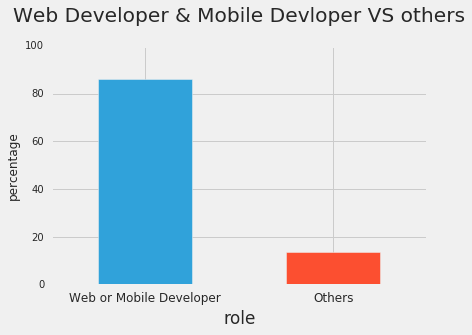

In [11]:
plt.style.use("fivethirtyeight")
vals.plot.bar()
plt.title("Web Developer & Mobile Devloper VS others",y=1.08)
plt.ylabel("percentage",fontsize=12)
plt.xlabel("role")
plt.xticks([0,1],["Web or Mobile Developer","Others"],rotation=0,fontsize=12)
plt.ylim(0,100)
plt.show()

From above we can clearly see that 86 percent of the population are interested in web or mobile developer jobs which is very representive of the population we are interested in as most courses we offer are on web and mobile development.

In [12]:
coders["jobroleinterest"].describe()

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: jobroleinterest, dtype: object

In [13]:
coders_g=coders[coders["jobroleinterest"].notnull()].copy()

In [14]:
cl_ab=coders_g["countrylive"].value_counts()
cl_rel=coders_g["countrylive"].value_counts(normalize=True)*100
freq=pd.DataFrame(data={"absolute frequency":cl_ab,"percentage":cl_rel})
freq

,absolute frequency,percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Clearly from above we can see that united states of america is at the top spot with 3125 people thats about 46 percent of the whole. we can understand this because the website which conducted this survey was from USA. and that website was more popular in that country. Next comes india with 528 participants about 7.7 percent. we can choose top four countries (i.e usa, india,uk,canada) for our advertisement because these countries have maximum percentages and also english is an official language in all four countries.

we need to dig deeper and find out more information. just because there are more participants from usa we cant tell that is the best market. we also need to look at the population.because there might be ppl from other countries how have not responded to the survey but might be interested to pursue some course. like in india though very less people responded, the 

we should also look at how uch on average people from different countries are willing to pay. if the cost is way below of our fees for courses then the investment will be a waste to advertise there.

The moneyforlearning column tells us how much money in American dollars did each participant invest into learning from the moment they started coding untill they completed the survey.

our company sells subcriptions at a price of $59 per month.
we need to divide the moneylearning column by monthsprogramming column to get how much each person spent per month on learning.

In [15]:
coders_g["monthsprogramming"].replace(0,1,inplace=True)
coders_g["moneypermonth"]=coders_g["moneyforlearning"]/coders_g["monthsprogramming"]
coders_g=coders_g[coders_g["moneypermonth"].notnull()].copy()

In [16]:
coders_g=coders_g[coders_g["countrylive"].notnull()]

above we have removed rows from the dataset where money_per_column is null and country live is null

In [17]:
coders_g["countrylive"].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: countrylive, dtype: int64

In [18]:
country_mean=coders_g.groupby(["countrylive"]).mean()
country_mean["moneypermonth"][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

countrylive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: moneypermonth, dtype: float64

we can see that out of the four countries 3 countries average money per month for learning is greater than our subscription fees. only United Kingdom has less than $56.

# outliers

In [19]:
only_4=coders_g[coders_g["countrylive"].str.contains("United States of America|India|United Kingdom|Canada")]
only_4=only_4.reset_index(drop=True)
print(only_4.shape)
only_4.head()

(3915, 137)


,age,attendedbootcamp,bootcampfinish,bootcamploanyesno,bootcampname,bootcamprecommend,childrennumber,citypopulation,codeeventconferences,codeeventdjangogirls,codeeventfcc,codeeventgamejam,codeeventgirldev,codeeventhackathons,codeeventmeetup,codeeventnodeschool,codeeventnone,codeeventother,codeeventrailsbridge,codeeventrailsgirls,codeeventstartupwknd,codeeventwkdbootcamps,codeeventwomencode,codeeventworkshops,commutetime,countrycitizen,countrylive,employmentfield,employmentfieldother,employmentstatus,employmentstatusother,expectedearning,financiallysupporting,firstdevjob,gender,genderother,haschildren,hasdebt,hasfinancialdependents,hashighspdinternet,hashomemortgage,hasservedinmilitary,hasstudentdebt,homemortgageowe,hourslearning,id.x,id.y,income,isethnicminority,isreceivedisabilitiesbenefits,issoftwaredev,isunderemployed,jobapplywhen,jobinterestbackend,jobinterestdataengr,jobinterestdatasci,jobinterestdevops,jobinterestfrontend,jobinterestfullstack,jobinterestgamedev,jobinterestinfosec,jobinterestmobile,jobinterestother,jobinterestprojmngr,jobinterestqaengr,jobinterestux,jobpref,jobrelocateyesno,jobroleinterest,jobwherepref,languageathome,maritalstatus,moneyforlearning,monthsprogramming,networkid,part1endtime,part1starttime,part2endtime,part2starttime,podcastchangelog,podcastcodenewbie,podcastcodepen,podcastdevtea,podcastdotnet,podcastgiantrobots,podcastjsair,podcastjsjabber,podcastnone,podcastother,podcastprogthrowdown,podcastrubyrogues,podcastsedaily,podcastseradio,podcastshoptalk,podcasttalkpython,podcastthewebahead,resourcecodecademy,resourcecodewars,resourcecoursera,resourcecss,resourceedx,resourceegghead,resourcefcc,resourcehackerrank,resourceka,resourcelynda,resourcemdn,resourceodinproj,resourceother,resourcepluralsight,resourceskillcrush,resourceso,resourcetreehouse,resourceudacity,resourceudemy,resourcew3s,schooldegree,schoolmajor,studentdebtowe,youtubecodecourse,youtubecodingtrain,youtubecodingtut360,youtubecomputerphile,youtubederekbanas,youtubedevtips,youtubeengineeredtruth,youtubefcc,youtubefunfunfunction,youtubegoogledev,youtubelearncode,youtubeleveluptuts,youtubemit,youtubemozillahacks,youtubeother,youtubesimplilearn,youtubethenewboston,moneypermonth
0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
1,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or e

In [20]:
count_m=coders_g.groupby(["countrylive"]).mean()
count_m["moneypermonth"][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

countrylive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: moneypermonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



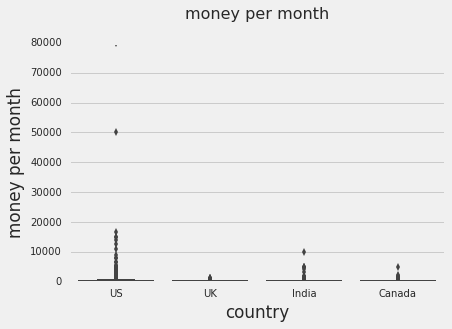

In [21]:
sns.boxplot(x="countrylive",y="moneypermonth",data=only_4)
plt.title("money per month",fontsize=16,y=1.08)
plt.xticks(range(4),['US','UK', 'India','Canada'])
plt.xlabel("country")
plt.ylabel("money per month")
plt.show()

In [22]:
only_4=only_4[only_4["moneypermonth"]<20000]

In [23]:
only_4.groupby(["countrylive"]).mean()["moneypermonth"]

countrylive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: moneypermonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



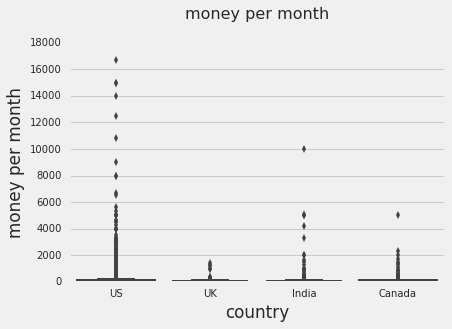

In [24]:
sns.boxplot(x="countrylive",y="moneypermonth",data=only_4)
plt.title("money per month",fontsize=16,y=1.08)
plt.xticks(range(4),['US','UK', 'India','Canada'])
plt.xlabel("country")
plt.ylabel("money per month")
plt.show()

We can see few extreme outliers for India and USA . but we dont know whether its good data or not. 

Some of them are over $ 10000 per month for US and above 5000 for india. we need to check whether this is good data or not. 

we gotta check if these people attended any kind of bootcamp, which might justify the large amount of money. lets start with US.

In [25]:
us_out=only_4[(only_4["countrylive"]=="United States of America")&(only_4["moneypermonth"]>5000)]
print(us_out.shape)
us_out

(13, 137)


,age,attendedbootcamp,bootcampfinish,bootcamploanyesno,bootcampname,bootcamprecommend,childrennumber,citypopulation,codeeventconferences,codeeventdjangogirls,codeeventfcc,codeeventgamejam,codeeventgirldev,codeeventhackathons,codeeventmeetup,codeeventnodeschool,codeeventnone,codeeventother,codeeventrailsbridge,codeeventrailsgirls,codeeventstartupwknd,codeeventwkdbootcamps,codeeventwomencode,codeeventworkshops,commutetime,countrycitizen,countrylive,employmentfield,employmentfieldother,employmentstatus,employmentstatusother,expectedearning,financiallysupporting,firstdevjob,gender,genderother,haschildren,hasdebt,hasfinancialdependents,hashighspdinternet,hashomemortgage,hasservedinmilitary,hasstudentdebt,homemortgageowe,hourslearning,id.x,id.y,income,isethnicminority,isreceivedisabilitiesbenefits,issoftwaredev,isunderemployed,jobapplywhen,jobinterestbackend,jobinterestdataengr,jobinterestdatasci,jobinterestdevops,jobinterestfrontend,jobinterestfullstack,jobinterestgamedev,jobinterestinfosec,jobinterestmobile,jobinterestother,jobinterestprojmngr,jobinterestqaengr,jobinterestux,jobpref,jobrelocateyesno,jobroleinterest,jobwherepref,languageathome,maritalstatus,moneyforlearning,monthsprogramming,networkid,part1endtime,part1starttime,part2endtime,part2starttime,podcastchangelog,podcastcodenewbie,podcastcodepen,podcastdevtea,podcastdotnet,podcastgiantrobots,podcastjsair,podcastjsjabber,podcastnone,podcastother,podcastprogthrowdown,podcastrubyrogues,podcastsedaily,podcastseradio,podcastshoptalk,podcasttalkpython,podcastthewebahead,resourcecodecademy,resourcecodewars,resourcecoursera,resourcecss,resourceedx,resourceegghead,resourcefcc,resourcehackerrank,resourceka,resourcelynda,resourcemdn,resourceodinproj,resourceother,resourcepluralsight,resourceskillcrush,resourceso,resourcetreehouse,resourceudacity,resourceudemy,resourcew3s,schooldegree,schoolmajor,studentdebtowe,youtubecodecourse,youtubecodingtrain,youtubecodingtut360,youtubecomputerphile,youtubederekbanas,youtubedevtips,youtubeengineeredtruth,youtubefcc,youtubefunfunfunction,youtubegoogledev,youtubelearncode,youtubeleveluptuts,youtubemit,youtubemozillahacks,youtubeother,youtubesimplilearn,youtubethenewboston,moneypermonth
196,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
346,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Out of 13 members who spent more than 5000 dollars have attended bootcamp so we will remove the rest 5 rows which act as outliers 

In [26]:
no_bootcamp=only_4[(only_4["countrylive"]=='United States of America')&
                   (only_4["moneypermonth"]>5000)&
                   (only_4["attendedbootcamp"]==0)]
only_4=only_4.drop(no_bootcamp.index)

less_than_3_months=only_4[(only_4["countrylive"]=='United States of America')&
                   (only_4["moneypermonth"]>5000)&
                   (only_4["monthsprogramming"]<=3)]
only_4=only_4.drop(less_than_3_months.index)
only_4=only_4.drop(only_4.index[1759])

In [27]:
only_4.groupby("countrylive").mean()["moneypermonth"]

countrylive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    138.987472
Name: moneypermonth, dtype: float64

after we removed the outliers we got the money per month column average for US as 160. Next we will look at the outliers from india.

In [28]:
india_out=only_4[(only_4['countrylive']=='India')
                &(only_4['moneypermonth']>3500)]
india_out

,age,attendedbootcamp,bootcampfinish,bootcamploanyesno,bootcampname,bootcamprecommend,childrennumber,citypopulation,codeeventconferences,codeeventdjangogirls,codeeventfcc,codeeventgamejam,codeeventgirldev,codeeventhackathons,codeeventmeetup,codeeventnodeschool,codeeventnone,codeeventother,codeeventrailsbridge,codeeventrailsgirls,codeeventstartupwknd,codeeventwkdbootcamps,codeeventwomencode,codeeventworkshops,commutetime,countrycitizen,countrylive,employmentfield,employmentfieldother,employmentstatus,employmentstatusother,expectedearning,financiallysupporting,firstdevjob,gender,genderother,haschildren,hasdebt,hasfinancialdependents,hashighspdinternet,hashomemortgage,hasservedinmilitary,hasstudentdebt,homemortgageowe,hourslearning,id.x,id.y,income,isethnicminority,isreceivedisabilitiesbenefits,issoftwaredev,isunderemployed,jobapplywhen,jobinterestbackend,jobinterestdataengr,jobinterestdatasci,jobinterestdevops,jobinterestfrontend,jobinterestfullstack,jobinterestgamedev,jobinterestinfosec,jobinterestmobile,jobinterestother,jobinterestprojmngr,jobinterestqaengr,jobinterestux,jobpref,jobrelocateyesno,jobroleinterest,jobwherepref,languageathome,maritalstatus,moneyforlearning,monthsprogramming,networkid,part1endtime,part1starttime,part2endtime,part2starttime,podcastchangelog,podcastcodenewbie,podcastcodepen,podcastdevtea,podcastdotnet,podcastgiantrobots,podcastjsair,podcastjsjabber,podcastnone,podcastother,podcastprogthrowdown,podcastrubyrogues,podcastsedaily,podcastseradio,podcastshoptalk,podcasttalkpython,podcastthewebahead,resourcecodecademy,resourcecodewars,resourcecoursera,resourcecss,resourceedx,resourceegghead,resourcefcc,resourcehackerrank,resourceka,resourcelynda,resourcemdn,resourceodinproj,resourceother,resourcepluralsight,resourceskillcrush,resourceso,resourcetreehouse,resourceudacity,resourceudemy,resourcew3s,schooldegree,schoolmajor,studentdebtowe,youtubecodecourse,youtubecodingtrain,youtubecodingtut360,youtubecomputerphile,youtubederekbanas,youtubedevtips,youtubeengineeredtruth,youtubefcc,youtubefunfunfunction,youtubegoogledev,youtubelearncode,youtubeleveluptuts,youtubemit,youtubemozillahacks,youtubeother,youtubesimplilearn,youtubethenewboston,moneypermonth
478,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
2050,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15 to 29 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,500000.0,1.0,NaN,male,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,20.0,a6a5597bbbc2c282386d6675641b744a,da7bbb54a8b26a379707be56b6c51e65,300000.0,0.0,0.0,0.0,0.0,more than 12 months from now,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"User Experience Designer, Back-End Web Devel...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,c47a447b5d,2017-03-26 14:06:48,2017-03-26 14:02:41,2017-03-26 14:13:13,2017-03-26 14:07:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not listened to anything yet.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,

we can see that in india people who paid more than 2500 dollars per month did not attend any bootcamp. they might have included their university tution fee while calculating this money per month. so we can remove these outliers.

In [29]:
ind_no_boot=only_4[(only_4["countrylive"]=='India')&
                  (only_4["moneypermonth"]>3500)&
                  (only_4["attendedbootcamp"]==0)]
only_4= only_4.drop(ind_no_boot.index)

In [30]:
only_4.groupby("countrylive").mean()["moneypermonth"]

countrylive
Canada                      113.510961
India                        72.893205
United Kingdom               45.534443
United States of America    138.987472
Name: moneypermonth, dtype: float64

In [31]:
canada_out=only_4[(only_4["countrylive"]=='Canada')&
                 (only_4["moneypermonth"]>4000)]
canada_out

,age,attendedbootcamp,bootcampfinish,bootcamploanyesno,bootcampname,bootcamprecommend,childrennumber,citypopulation,codeeventconferences,codeeventdjangogirls,codeeventfcc,codeeventgamejam,codeeventgirldev,codeeventhackathons,codeeventmeetup,codeeventnodeschool,codeeventnone,codeeventother,codeeventrailsbridge,codeeventrailsgirls,codeeventstartupwknd,codeeventwkdbootcamps,codeeventwomencode,codeeventworkshops,commutetime,countrycitizen,countrylive,employmentfield,employmentfieldother,employmentstatus,employmentstatusother,expectedearning,financiallysupporting,firstdevjob,gender,genderother,haschildren,hasdebt,hasfinancialdependents,hashighspdinternet,hashomemortgage,hasservedinmilitary,hasstudentdebt,homemortgageowe,hourslearning,id.x,id.y,income,isethnicminority,isreceivedisabilitiesbenefits,issoftwaredev,isunderemployed,jobapplywhen,jobinterestbackend,jobinterestdataengr,jobinterestdatasci,jobinterestdevops,jobinterestfrontend,jobinterestfullstack,jobinterestgamedev,jobinterestinfosec,jobinterestmobile,jobinterestother,jobinterestprojmngr,jobinterestqaengr,jobinterestux,jobpref,jobrelocateyesno,jobroleinterest,jobwherepref,languageathome,maritalstatus,moneyforlearning,monthsprogramming,networkid,part1endtime,part1starttime,part2endtime,part2starttime,podcastchangelog,podcastcodenewbie,podcastcodepen,podcastdevtea,podcastdotnet,podcastgiantrobots,podcastjsair,podcastjsjabber,podcastnone,podcastother,podcastprogthrowdown,podcastrubyrogues,podcastsedaily,podcastseradio,podcastshoptalk,podcasttalkpython,podcastthewebahead,resourcecodecademy,resourcecodewars,resourcecoursera,resourcecss,resourceedx,resourceegghead,resourcefcc,resourcehackerrank,resourceka,resourcelynda,resourcemdn,resourceodinproj,resourceother,resourcepluralsight,resourceskillcrush,resourceso,resourcetreehouse,resourceudacity,resourceudemy,resourcew3s,schooldegree,schoolmajor,studentdebtowe,youtubecodecourse,youtubecodingtrain,youtubecodingtut360,youtubecomputerphile,youtubederekbanas,youtubedevtips,youtubeengineeredtruth,youtubefcc,youtubefunfunfunction,youtubegoogledev,youtubelearncode,youtubeleveluptuts,youtubemit,youtubemozillahacks,youtubeother,youtubesimplilearn,youtubethenewboston,moneypermonth
2970,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


well there are no participants in canada who have spent more than 4000 per month and have not gone to bootcamp. but  this participant had been programming for no more than two months when he completed the survey.
so we will remove this participant.

In [32]:
can_out_rem=only_4[(only_4["countrylive"]=='Canada')&
                 (only_4["moneypermonth"]>4000)&
             (only_4["monthsprogramming"]<=3)]
only_4=only_4.drop(can_out_rem.index)

In [34]:
only_4.groupby("countrylive").mean()["moneypermonth"]

countrylive
Canada                       93.065400
India                        72.893205
United Kingdom               45.534443
United States of America    138.987472
Name: moneypermonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



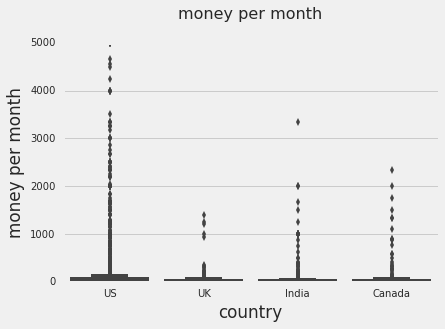

In [33]:
sns.boxplot(x="countrylive",y="moneypermonth",data=only_4)
plt.title("money per month",fontsize=16,y=1.08)
plt.xticks(range(4),['US','UK', 'India','Canada'])
plt.xlabel("country")
plt.ylabel("money per month")
plt.show()